In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [6]:
df = pd.read_csv(("~/Desktop/Data_Science/ESSdata_Thinkful.csv")).dropna()

# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

In [7]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191


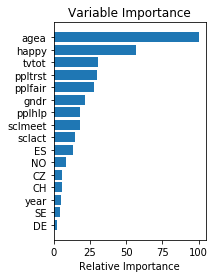

In [8]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## DRILL: Improve this gradient boost model
While this model is already doing alright, we've seen from the Type I and Type II error rates that there is definitely room for improvement. Your task is to see how low you can get the error rates to go in the test set, based on your model in the training set. Strategies you might use include:

Creating new features
Applying more overfitting-prevention strategies like subsampling
More iterations
Trying a different loss function
Changing the structure of the weak learner: Allowing more leaves in the tree, or other modifications

### Create new features

In [10]:
X.head()

,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,CH,CZ,DE,ES,NO,SE
0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1,0,0,0,0,0
1,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1,0,0,0,0,0
2,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,1,0,0,0,0,0
3,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1,0,0,0,0,0
4,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1,0,0,0,0,0


In [13]:
X['sclmeet'].value_counts()

6.0    2653
7.0    1576
4.0    1517
5.0    1396
3.0     563
2.0     365
1.0      77
Name: sclmeet, dtype: int64

In [14]:
X['sclact'].value_counts()

3.0    3917
2.0    2110
4.0    1162
1.0     739
5.0     219
Name: sclact, dtype: int64

In [11]:
X['meet_act'] = X['sclmeet'] * X['sclact']

In [15]:
X['meet-act'] = X['sclmeet'] - X['sclact']

In [16]:
# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.049236224768139665
Percent Type II errors: 0.1756683033278778

Test set accuracy:
Percent Type I errors: 0.05766871165644172
Percent Type II errors: 0.18404907975460122


In [25]:
0.1760-0.1853

-0.009300000000000003

By adding features that make use of two less important variables, the comparative accuracy between the training set and test set has improved .  The Type I gap decreased by half, from 0.016 to 0.008.  The Type II decreased by 0.001, from 0.009 to 0.008.

### Feature Sub-sample

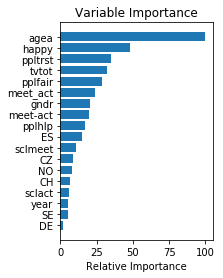

In [17]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [20]:
# drop the least important half of features
X.drop(['DE', 'SE', 'year', 'sclact', 'CH', 'NO', 'CZ', 'sclmeet', 'ES'], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.049236224768139665
Percent Type II errors: 0.1756683033278778

Test set accuracy:
Percent Type I errors: 0.05766871165644172
Percent Type II errors: 0.18404907975460122


Results here are smilar to adding features.

### Test Iterations

In [27]:
# re-define X
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

In [37]:
#Test increase in iterations

interation_results = pd.DataFrame()

def iteration_fit(iterations):
    params = {'n_estimators': iterations,
          'max_depth': 2,
          'loss': 'deviance'}
    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)
    
    predict_train = clf.predict(X_train)
    predict_test = clf.predict(X_test)

    # Accuracy tables.
    table_train = pd.crosstab(y_train, predict_train, margins=True)
    table_test = pd.crosstab(y_test, predict_test, margins=True)

    train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
    train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

    test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
    test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']
    
    data = pd.DataFrame({"interation_number": [iterations], "train_tI": [train_tI_errors], "train_tII": [train_tII_errors],
                        "test_tI": [test_tI_errors], "test_tII": [test_tII_errors]})
    return data
                                       
appended_data = []
test_range = np.arange(100, 2000, 100)
for i in test_range:
    result = iteration_fit(i)
    appended_data.append(result)
iteration_results = pd.concat(appended_data, ignore_index=True)

print(iteration_results.head())

   interation_number   test_tI  test_tII  train_tI  train_tII
0                100  0.050307  0.208589  0.040371   0.196672
1                200  0.053988  0.197546  0.044463   0.186579
2                300  0.053988  0.188957  0.045827   0.180306
3                400  0.060123  0.187730  0.046918   0.178532
4                500  0.062577  0.185276  0.046508   0.176077


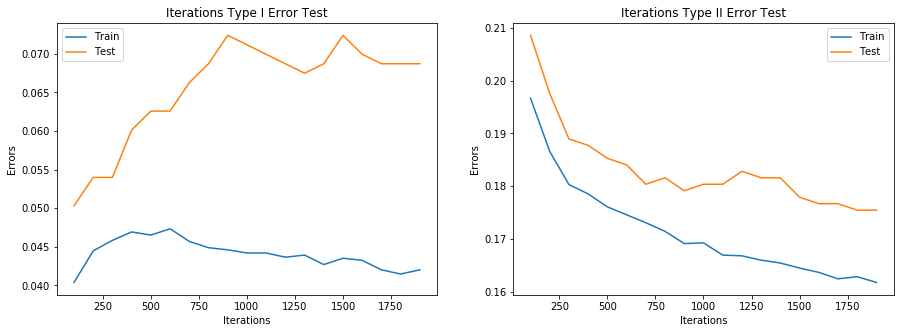

In [38]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(iteration_results['interation_number'], iteration_results['train_tI'], label="Train")
plt.plot(iteration_results['interation_number'], iteration_results['test_tI'], label="Test")
plt.xlabel('Iterations')
plt.ylabel('Errors')
plt.legend(loc='best') 
plt.title('Iterations Type I Error Test')

plt.subplot(1, 2, 2)
plt.plot(iteration_results['interation_number'], iteration_results['train_tII'], label="Train")
plt.plot(iteration_results['interation_number'], iteration_results['test_tII'], label="Test")
plt.xlabel('Iterations')
plt.ylabel('Errors')
plt.legend(loc='best') 
plt.title('Iterations Type II Error Test')

plt.show()

Type I errors are generally smaller with a smaller number of iterations, while Type II errors generally get smaller as the number of iterations increases.

### Test Max Depth

In [42]:
#Test increase in iterations

depth_results = pd.DataFrame()

def depth_fit(depth):
    params = {'n_estimators': 500,
          'max_depth': depth,
          'loss': 'deviance'}
    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)
    
    predict_train = clf.predict(X_train)
    predict_test = clf.predict(X_test)

    # Accuracy tables.
    table_train = pd.crosstab(y_train, predict_train, margins=True)
    table_test = pd.crosstab(y_test, predict_test, margins=True)

    train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
    train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

    test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
    test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']
    
    data = pd.DataFrame({"depth_number": [depth], "train_tI": [train_tI_errors], "train_tII": [train_tII_errors],
                        "test_tI": [test_tI_errors], "test_tII": [test_tII_errors]})
    return data
                                       
appended_data = []
test_range = np.arange(1, 10, 1)
for i in test_range:
    result = depth_fit(i)
    appended_data.append(result)
depth_results = pd.concat(appended_data, ignore_index=True)

print(depth_results.head())

   depth_number   test_tI  test_tII  train_tI  train_tII
0             1  0.047853  0.207362  0.046236   0.199536
1             2  0.062577  0.185276  0.046508   0.176077
2             3  0.084663  0.181595  0.035052   0.152346
3             4  0.085890  0.181595  0.019504   0.118249
4             5  0.105521  0.174233  0.006137   0.068603


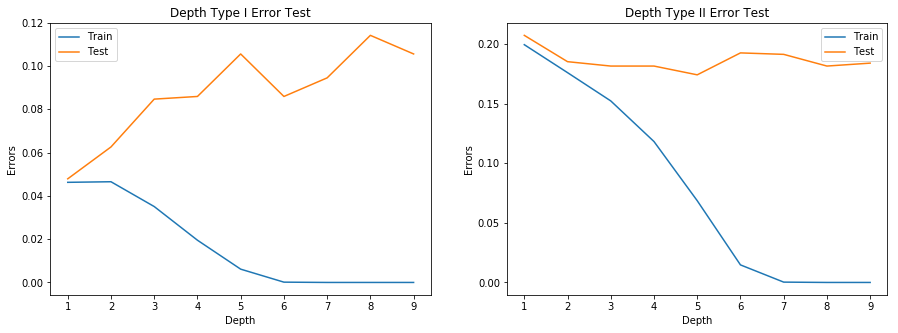

In [43]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(depth_results['depth_number'], depth_results['train_tI'], label="Train")
plt.plot(depth_results['depth_number'], depth_results['test_tI'], label="Test")
plt.xlabel('Depth')
plt.ylabel('Errors')
plt.legend(loc='best') 
plt.title('Depth Type I Error Test')

plt.subplot(1, 2, 2)
plt.plot(depth_results['depth_number'], depth_results['train_tII'], label="Train")
plt.plot(depth_results['depth_number'], depth_results['test_tII'], label="Test")
plt.xlabel('Depth')
plt.ylabel('Errors')
plt.legend(loc='best') 
plt.title('Depth Type II Error Test')

plt.show()

While the training data shows reduced errors with more depth, this is just a case of over-fitting, as evidenced by the much higher errors in the test set.